<a href="https://colab.research.google.com/github/vigneshpatel14/Deep-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import PIL.Image as Image
import os

import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


import tensorflow_hub as hub


In [15]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version:", hub.__version__)

TensorFlow Version: 2.17.1
TensorFlow Hub Version: 0.16.1


In [20]:
from tensorflow import keras

In [23]:
mobilenet_v2 = hub.load("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")

# Wrap it in a custom Keras layer using Lambda
def model_fn(x):
    return mobilenet_v2(x)

classifier = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SHAPE + (3,)),
    tf.keras.layers.Lambda(model_fn)
])

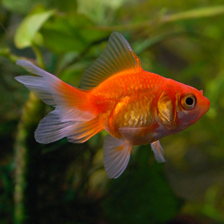

In [26]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [27]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [28]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [29]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(1, 1001)

In [30]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [33]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'/root/.keras/datasets/ImageNetLabels.txt'

In [34]:
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

In [36]:
image_labels[predicted_label_index]

'goldfish'

In [37]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [38]:
data_dir

'./datasets/flower_photos'

In [39]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [41]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/2447151631_7551e6377b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13472387874_d844478dbb.jpg'),
 PosixPath('datasets/flower_photos/tulips/17199496791_3caaf5e278_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/15147464747_594599c855_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/6539831765_c21b68910e_n.jpg')]

In [42]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [43]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14573732424_1bb91e2e42_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2675221506_5286c0595f.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg')]

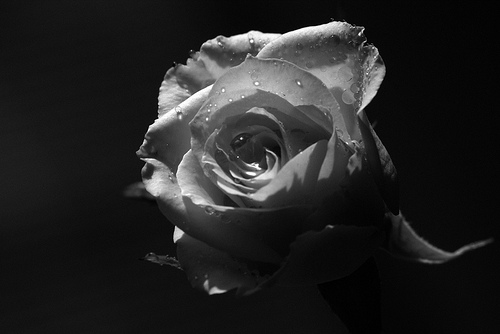

In [45]:
Image.open(str(roses[1]))

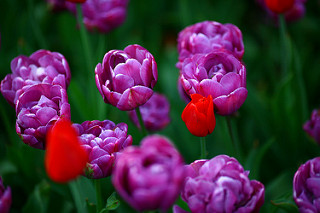

In [46]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [47]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [48]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [49]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/14573732424_1bb91e2e42_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2675221506_5286c0595f.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg')]

In [50]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/14573732424_1bb91e2e42_n.jpg'

In [51]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(235, 320, 3)

In [52]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [53]:
X , y = [] , []

for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [54]:
X = np.array(X)
y = np.array(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [56]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [57]:
X[0].shape

(224, 224, 3)

In [59]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [60]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [61]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([722, 795, 722])

In [62]:
image_labels[795]

'shower curtain'

In [66]:
import tensorflow as tf
import tensorflow_hub as hub

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

# Wrap the hub.KerasLayer inside a Lambda layer
model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: pretrained_model_without_top_layer(x)),
    tf.keras.layers.Dense(5, activation='softmax')  # Replace 5 with your class count
])

model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - acc: 0.5776 - loss: 1.0622
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - acc: 0.8490 - loss: 0.4367
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - acc: 0.8968 - loss: 0.3125
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.9200 - loss: 0.2698
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.9333 - loss: 0.2228


In [68]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - acc: 0.8594 - loss: 0.3529


[0.3540009558200836, 0.8649237751960754]